In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Import the required libraries. Pandas is used just to read the csv file.

Please download the dataset from kaggle.
You should have "mnist_train.csv" in your working directory.

In [ ]:
data=pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [ ]:
data.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Split the training and testing data**

* data_dev : testing data (1000)
* data_train : training data (59000)

m=60000

n=785


In [ ]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255 #Normalise the image matrix

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
def init_params():
  W1=np.random.rand(10,784)-0.5
  b1=np.random.rand(10,1)-0.5
  W2=np.random.rand(10,10)-0.5
  b2=np.random.rand(10,1)-0.5
  return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A=np.exp(Z)/sum(np.exp(Z))
    return A

Our NN will have a simple two-layer architecture. Input layer  a[0]
  will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  a[1]
  will have 10 units with ReLU activation, and finally our output layer  a[2]
  will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward Propagation:**


* Z[1]=W[1]X+b[1]
* A[1]=ReLU(Z[1])
* Z[2]=W[2]A[1]+b[2]
* A[2]=softmax(Z[2])




In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):  #Funtion to set the corresponding label index to one and all other to zero
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

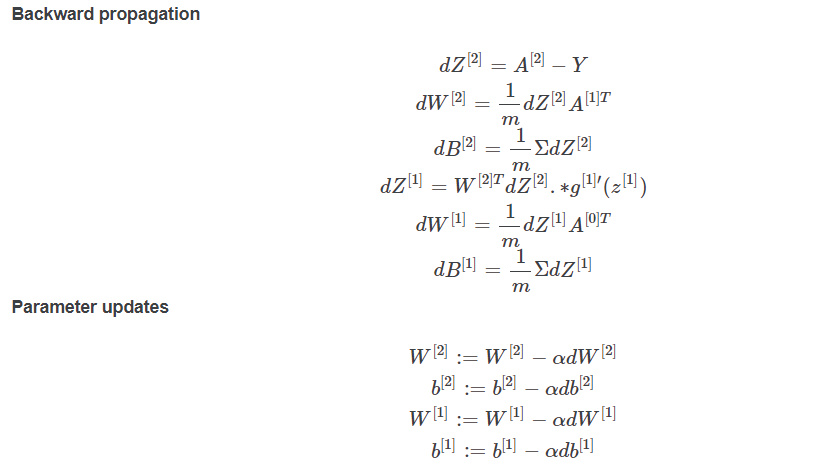

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 8 0 ... 0 8 0] [4 6 4 ... 4 0 6]
0.07863571766935101
Iteration:  10
[9 4 0 ... 0 6 7] [4 6 4 ... 4 0 6]
0.2407495131322701
Iteration:  20
[9 6 6 ... 9 6 4] [4 6 4 ... 4 0 6]
0.3370177377756724
Iteration:  30
[4 6 6 ... 4 6 6] [4 6 4 ... 4 0 6]
0.42491710090004736
Iteration:  40
[4 6 6 ... 4 0 6] [4 6 4 ... 4 0 6]
0.4971840623190694
Iteration:  50
[4 6 6 ... 4 0 6] [4 6 4 ... 4 0 6]
0.5457129322595926
Iteration:  60
[4 6 4 ... 4 0 6] [4 6 4 ... 4 0 6]
0.5854518658876783
Iteration:  70
[4 6 4 ... 4 0 6] [4 6 4 ... 4 0 6]
0.6160324227590925
Iteration:  80
[4 6 4 ... 4 0 6] [4 6 4 ... 4 0 6]
0.6395599768408864
Iteration:  90
[4 6 4 ... 4 0 6] [4 6 4 ... 4 0 6]
0.65998210432128
Iteration:  100
[4 6 4 ... 4 0 6] [4 6 4 ... 4 0 6]
0.6766671930101584
Iteration:  110
[4 6 4 ... 4 0 6] [4 6 4 ... 4 0 6]
0.6924574977630401
Iteration:  120
[4 6 4 ... 4 0 6] [4 6 4 ... 4 0 6]
0.7058266224538133
Iteration:  130
[4 6 4 ... 4 0 6] [4 6 4 ... 4 0 6]
0.7171956418758882
Iteration:  140
[

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


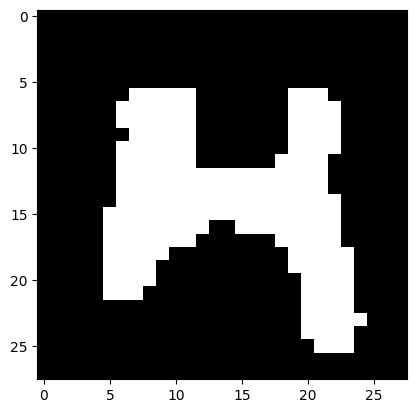

Prediction:  [6]
Label:  6


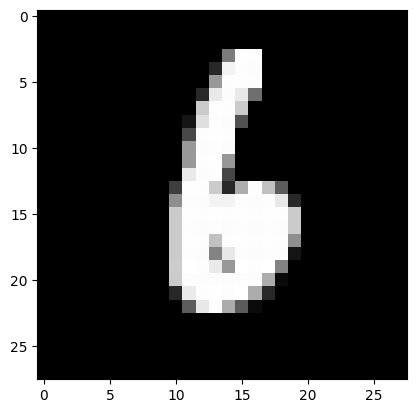

Prediction:  [4]
Label:  4


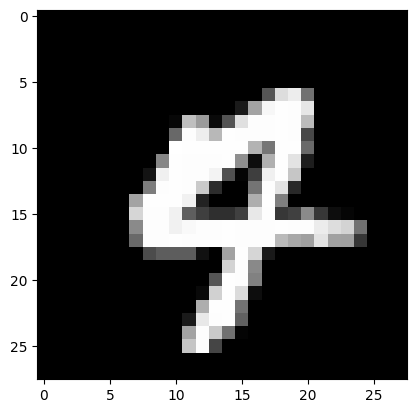

Prediction:  [4]
Label:  4


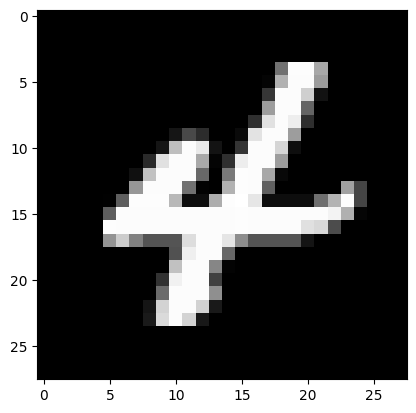

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)